In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns

import librosa
import librosa.display


In [68]:
JSON_DIR = "../data/01_raw/2_record_mono"
EXP_DIR = "../data/03_report/2_record"
Path(EXP_DIR).mkdir(exist_ok=True, parents=True)

In [69]:
json_paths = list(Path(JSON_DIR).glob("*.json"))
json_paths = [str(p) for p in json_paths]
json_paths.sort()
json_paths

['../data/01_raw/2_record_mono/cicada_carpark.mono.json',
 '../data/01_raw/2_record_mono/rain_lot.mono.json',
 '../data/01_raw/2_record_mono/rain_tap_umbrella.mono.json',
 '../data/01_raw/2_record_mono/raindrops_tap_ground(asphalt).mono.json',
 '../data/01_raw/2_record_mono/river_into_hand.mono.json',
 '../data/01_raw/2_record_mono/river_stone_throw.mono.json',
 '../data/01_raw/2_record_mono/shinkansen.mono.json',
 '../data/01_raw/2_record_mono/tokyocity_bakurocho.mono.json',
 '../data/01_raw/2_record_mono/tokyostation.mono.json']

In [70]:
import json
def load_f_json(json_path):
    with open(json_path, mode='rt', encoding='utf-8') as fp:
        data = json.load(fp)
    return data

load_f_json(json_paths[0])

{'wav_path': '../data/01_raw/2_record_mono/cicada_carpark.mono.wav',
 'loudness': 0.6566482359874104,
 'sharpness': 4.611929084446742,
 'roughness': 0.001205113429857605}

In [71]:
buf = []
for json_path in json_paths:
    data = load_f_json(json_path)
    buf.append(data)


In [72]:
df_data = pd.DataFrame(buf)

df_data["wav_name"] = df_data["wav_path"].apply(lambda x: Path(x).stem.split(".")[0])

df_data.to_csv(Path(EXP_DIR) / "df_data.csv", index=None)

del df_data

In [74]:
df_data = pd.read_csv(Path(EXP_DIR) / "df_data.csv")
df_data

,wav_path,loudness,sharpness,roughness,wav_name
0,../data/01_raw/2_record_mono/cicada_carpark.mo...,0.656648,4.611929,0.001205,cicada_carpark
1,../data/01_raw/2_record_mono/rain_lot.mono.wav,3.040709,1.482505,0.008727,rain_lot
2,../data/01_raw/2_record_mono/rain_tap_umbrella...,5.929063,1.367358,0.546835,rain_tap_umbrella
3,../data/01_raw/2_record_mono/raindrops_tap_gro...,3.907903,2.359040,0.534402,raindrops_tap_ground(asphalt)
4,../data/01_raw/2_record_mono/river_into_hand.m...,2.754799,1.710264,0.015031,river_into_hand
5,../data/01_raw/2_record_mono/river_stone_throw...,2.641144,1.667700,0.100109,river_stone_throw
6,../data/01_raw/2_record_mono/shinkansen.mono.wav,7.718985,0.564459,0.058151,shinkansen
7,../data/01_raw/2_record_mono/tokyocity_bakuroc...,16.238379,1.175398,0.044781,tokyocity_bakurocho
8,../data/01_raw/2_record_mono/tokyostation.mono...,18.282246,1.436602,0.170194,tokyostation


In [79]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
Nc = len(sorted_names)
print(Nc)
# sorted_names

156


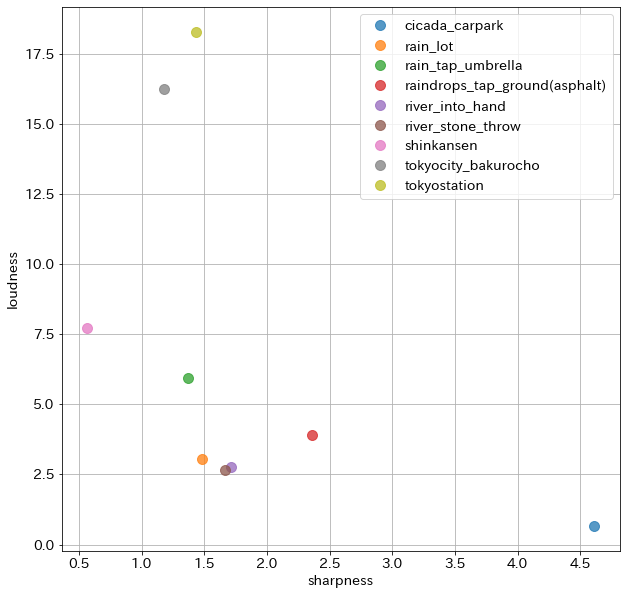

In [84]:
# colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
# colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
colorlist = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

y_feature = "loudness"
x_feature = "sharpness"
cat_feature = "wav_name"

plt.rcParams["font.size"] = 14

dfp = df_data.copy()


fig, ax = plt.subplots(figsize=(10, 10))
cats = dfp[cat_feature].unique()
for i, cat in enumerate(cats[:]):
    df1 = dfp.query(f"{cat_feature} == @cat")
    x = df1[x_feature]
    y = df1[y_feature]
    
    c = colorlist[i]
    
    plt.plot(x, y , "o", markersize=10, color=c, label=cat, alpha=0.75)
    plt.legend()
    
plt.ylabel(y_feature)
plt.xlabel(x_feature)
plt.grid()

plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")



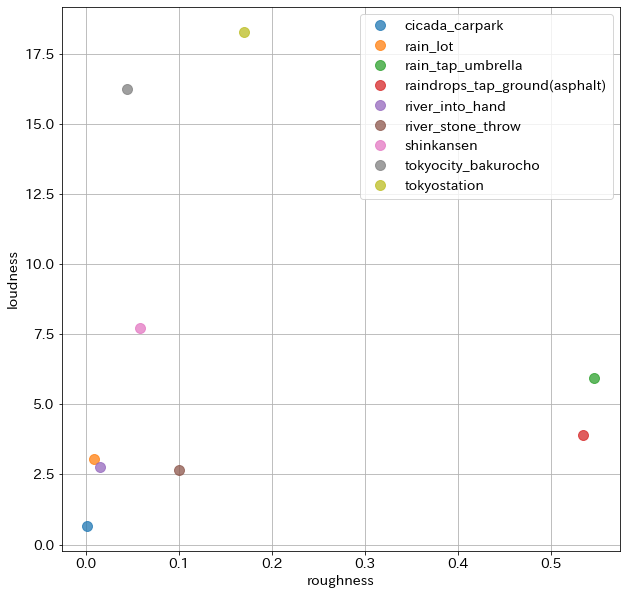

In [85]:
colorlist = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

y_feature = "loudness"
x_feature = "roughness"
cat_feature = "wav_name"

plt.rcParams["font.size"] = 14

dfp = df_data.copy()


fig, ax = plt.subplots(figsize=(10, 10))
cats = dfp[cat_feature].unique()
for i, cat in enumerate(cats[:]):
    df1 = dfp.query(f"{cat_feature} == @cat")
    x = df1[x_feature]
    y = df1[y_feature]
    
    c = colorlist[i]
    
    plt.plot(x, y , "o", markersize=10, color=c, label=cat, alpha=0.75)
    plt.legend()
    
plt.ylabel(y_feature)
plt.xlabel(x_feature)
plt.grid()

plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")



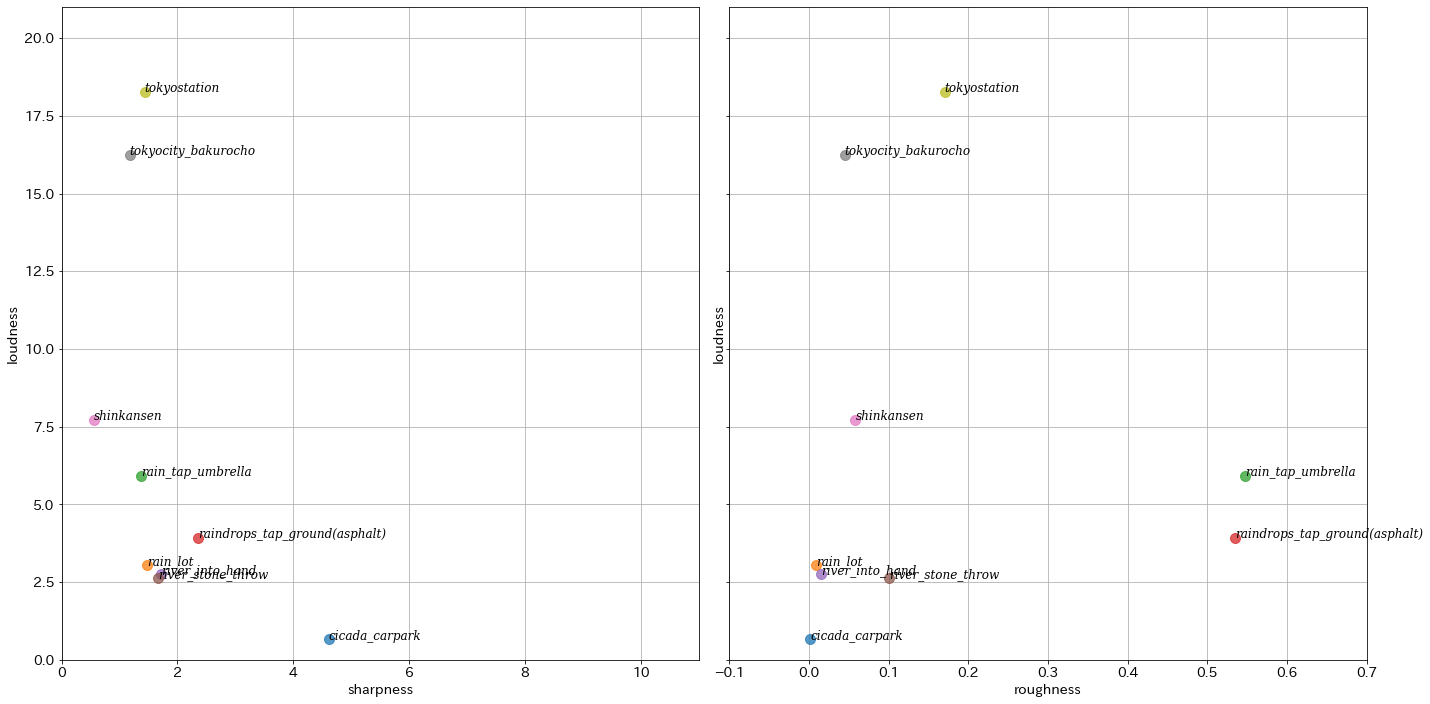

In [97]:
colorlist = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


y_feature = "loudness"
x_features = ["sharpness", "roughness"]

plt.rcParams["font.size"] = 14

dfp = df_data.copy()

fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
axs = ax.flatten()

for ax_no in [0, 1]:
    
    plt.sca(axs[ax_no])
    
    for i, df1 in dfp.iterrows():

        wav_name = df1["wav_name"]
        x_feature= x_features[ax_no]
        x = df1[x_feature]
        y = df1[y_feature]
        c = colorlist[i]
        
        plt.plot(x, y , "o", markersize=10, color=c, label=wav_name, alpha=0.75)
        plt.text(x, y, wav_name, color="#000000",
                                 fontfamily="serif",
                                 #fontweight="bold",
                                 fontstyle="italic",
                                 fontsize=12)

    axs[0].set_xlim([0, 11])
    axs[0].set_ylim([0, 21])
    axs[1].set_xlim([-0.1, 0.7])
    plt.tight_layout()
    #plt.legend()
    plt.ylabel(y_feature)
    plt.xlabel(x_feature)
    plt.grid()
    


plt.savefig(Path(EXP_DIR) / f"Loudness vs Sharpnes-Roghness.jpg")



